# Caffe introduction - MNIST

In [3]:
import os
os.chdir('..')
!pwd

/media/deepak/Code/Lab/caffe


In [2]:
!./data/mnist/get_mnist.sh
!./examples/mnist/create_mnist.sh

MNIST files are found.
Creating lmdb...
Done.


In [4]:
!ls examples/mnist/

convert_mnist_data.cpp
create_mnist.sh
lenet_adadelta_solver.prototxt
lenet_auto_solver.prototxt
lenet_auto_test.prototxt
lenet_auto_train.prototxt
lenet_consolidated_solver.prototxt
lenet_multistep_solver.prototxt
lenet.prototxt
lenet_solver_adam.prototxt
lenet_solver.prototxt
lenet_solver_rmsprop.prototxt
lenet_train_test.prototxt
mnist_autoencoder.prototxt
mnist_autoencoder_solver_adadelta.prototxt
mnist_autoencoder_solver_adagrad.prototxt
mnist_autoencoder_solver_nesterov.prototxt
mnist_autoencoder_solver.prototxt
mnist_test_lmdb
mnist_train_lmdb
readme.md
train_lenet_adam.sh
train_lenet_consolidated.sh
train_lenet_rmsprop.sh
train_lenet.sh
train_mnist_autoencoder_adadelta.sh
train_mnist_autoencoder_adagrad.sh
train_mnist_autoencoder_nesterov.sh
train_mnist_autoencoder.sh


## Data Layer
name: "LeNet" <br>
layer { <br>
  name: "mnist" <br>
  type: "Data"  <br>
  top: "data"   <br>
  top: "label"  <br>
  include {      <br>
    phase: TRAIN  <br>
  } <br>
  transform_param { <br>
    scale: 0.00390625 <br>
  } <br>
  data_param { <br>
    source: "examples/mnist/mnist_train_lmdb" <br>
    batch_size: 64 <br>
    backend: LMDB <br>
  }<br>
}<br>


## Convolution Layer
layer { <br>
  name: "conv1" <br>
  type: "Convolution" <br>
  param { lr_mult: 1 } <br>
  param { lr_mult: 2 } <br>
  convolution_param { <br>
    num_output: 20 <br>
    kernel_size: 5 <br>
    stride: 1 <br>
    weight_filler { <br>
      type: "xavier" <br>
    }<br>
    bias_filler { <br>
      type: "constant"<br>
    }<br>
  }<br>
  bottom: "data"<br>
  top: "conv1"<br>
}<br>

## Pooling Layer
layer { <br>
  name: "pool1" <br>
  type: "Pooling" <br>
  bottom: "conv1" <br>
  top: "pool1" <br>
  pooling_param { <br>
    pool: MAX <br>
    kernel_size: 2 <br>
    stride: 2 <br>
  } <br>
} <br>


### Fully Connected Layer
layer { <br>
  name: "ip1" <br>
  type: "InnerProduct" <br>
  bottom: "pool2" <br>
  top: "ip1" <br>
  param { <br>
    lr_mult: 1 <br>
  }<br>
  param {<br>
    lr_mult: 2<br>
  }<br>
  inner_product_param {<br>
    num_output: 500<br>
    weight_filler {<br>
      type: "xavier"<br>
    }<br>
    bias_filler {<br>
      type: "constant"<br>
    }<br>
  }<br>
}<br>
layer {<br>
  name: "relu1"<br>
  type: "ReLU"<br>
  bottom: "ip1"<br>
  top: "ip1"<br>
}<br>


### Loss Layer
layer { <br>
  name: "accuracy" <br>
  type: "Accuracy" <br>
  bottom: "ip2" <br>
  bottom: "label" <br>
  top: "accuracy" <br>
  include { <br>
    phase: TEST <br>
  } <br>
} <br>

## Output Layer
layer { <br>
  name: "loss" <br>
  type: "SoftmaxWithLoss" <br>
  bottom: "ip2" <br>
  bottom: "label" <br>
  top: "loss" <br>
}<br>


## Defining solver

net: "examples/mnist/lenet_train_test.prototxt" <br>
test_iter: 100<br>
test_interval: 500<br>
<br><br>
base_lr: 0.01<br>
momentum: 0.9<br>
weight_decay: 0.0005<br>

lr_policy: "inv"<br>
gamma: 0.0001<br>
power: 0.75<br>
<br><br>
display: 100<br>
<br>
snapshot: 5000<br>
snapshot_prefix: "examples/mnist/lenet"<br>
<br><br>
solver_mode: CPU<br>


In [6]:
!./examples/mnist/train_lenet.sh


I0110 18:09:56.108405 12358 caffe.cpp:177] Use CPU.
I0110 18:09:56.155115 12358 solver.cpp:48] Initializing solver from parameters: 
test_iter: 100
test_interval: 500
base_lr: 0.01
display: 100
max_iter: 10000
lr_policy: "inv"
gamma: 0.0001
power: 0.75
momentum: 0.9
weight_decay: 0.0005
snapshot: 5000
snapshot_prefix: "examples/mnist/lenet"
solver_mode: CPU
net: "examples/mnist/lenet_train_test.prototxt"
I0110 18:09:56.155465 12358 solver.cpp:91] Creating training net from net file: examples/mnist/lenet_train_test.prototxt
I0110 18:09:56.155876 12358 net.cpp:322] The NetState phase (0) differed from the phase (1) specified by a rule in layer mnist
I0110 18:09:56.155923 12358 net.cpp:322] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0110 18:09:56.156015 12358 net.cpp:49] Initializing net from parameters: 
name: "LeNet"
state {
  phase: TRAIN
}
layer {
  name: "mnist"
  type: "Data"
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }

In [3]:
import os
os.chdir('../')
!pwd
import caffe


/media/deepak/Code/Lab/caffe


In [38]:
import numpy as np
net = caffe.Classifier('./examples/mnist/lenet.prototxt','./examples/mnist/lenet_iter_10000.caffemodel',raw_scale=255,
                        image_dims=(28,28))



In [31]:
from pylab import *
%matplotlib inline

In [32]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (64, 1, 28, 28)),
 ('conv1', (64, 20, 24, 24)),
 ('pool1', (64, 20, 12, 12)),
 ('conv2', (64, 50, 8, 8)),
 ('pool2', (64, 50, 4, 4)),
 ('ip1', (64, 500)),
 ('ip2', (64, 10)),
 ('prob', (64, 10))]

In [33]:

import lmdb
import os
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array

lmdb_env = lmdb.open('./examples/mnist/mnist_test_lmdb/')
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
datum = caffe.proto.caffe_pb2.Datum()



In [ ]:
i=0
test_data = []
for key, value in lmdb_cursor:
    
    print i
    i=i+1
    datum.ParseFromString(value)
    label = datum.label
    data = caffe.io.datum_to_array(datum)
    print data.shape
    test_data.append(data)  
    print label
    image = caffe.io.datum_to_array(datum)
    #image = image.transpose((1,2,0))
    
    
    
    image2 = image.astype(float32)
    image2 = image2[:,:,:,np.newaxis]
    print image2.shape
    out = net.predict(image2)
    print out
   


0
(1, 28, 28)
7
(1, 28, 28, 1)
[[ 0.   0.   0.   0.   0.   0.5  0.   0.5  0.   0. ]]
1
(1, 28, 28)
2
(1, 28, 28, 1)
[[ 0.   0.   0.5  0.   0.   0.5  0.   0.   0.   0. ]]
2
(1, 28, 28)
1
(1, 28, 28, 1)
[[ 0.   0.5  0.   0.   0.   0.   0.   0.   0.5  0. ]]
3
(1, 28, 28)
0
(1, 28, 28, 1)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
4
(1, 28, 28)
4
(1, 28, 28, 1)
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
5
(1, 28, 28)
1
(1, 28, 28, 1)
[[ 0.   0.5  0.   0.   0.   0.   0.   0.   0.5  0. ]]
6
(1, 28, 28)
4
(1, 28, 28, 1)
[[ 0.   0.   0.   0.   0.5  0.   0.   0.   0.5  0. ]]
7
(1, 28, 28)
9
(1, 28, 28, 1)
[[ 0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.5]]
8
(1, 28, 28)
5
(1, 28, 28, 1)
[[ 0.   0.   0.5  0.   0.   0.5  0.   0.   0.   0. ]]
9
(1, 28, 28)
9
(1, 28, 28, 1)
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.5]]
10
(1, 28, 28)
0
(1, 28, 28, 1)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
11
(1, 28, 28)
6
(1, 28, 28, 1)
[[ 0.   0.   0.   0.   0.   0.   0.5  0.   0.5  0. ]]
12
(1, 2

In [21]:
len(test_data)

10000

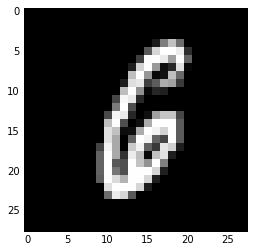

In [26]:
n=1212
imshow(test_data[n][0,:,:],interpolation='nearest' ,cmap='gray')

In [36]:
net.predict(test_data[0])

IndexError: tuple index out of range

In [20]:
inp = test_data[n]

In [42]:
inp[0].shape[1]

28

In [43]:
inp[0].shape

(28, 28)

In [44]:
test_data[0].shape

(1, 28, 28)

In [21]:
inp = test_data[n][:,:,:,np.newaxis]

In [52]:
inp.shape

(1, 28, 28, 1)

In [22]:
out=net.predict(inp)
out

array([[ 0.03708227,  0.50083572,  0.05102847,  0.04349394,  0.07090822,
         0.13824594,  0.04677303,  0.05969746,  0.0064086 ,  0.04552634]], dtype=float32)

In [27]:
#transformer
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})



In [28]:
transformer.

<caffe.io.Transformer instance at 0x7f487ce5c518>